In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [2]:
df = pd.read_csv(r'artifacts\data\fake_and_real_news.csv')

In [3]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [4]:
df['Text'][0]

' Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referr

In [5]:
df.isna().sum()

Text     0
label    0
dtype: int64

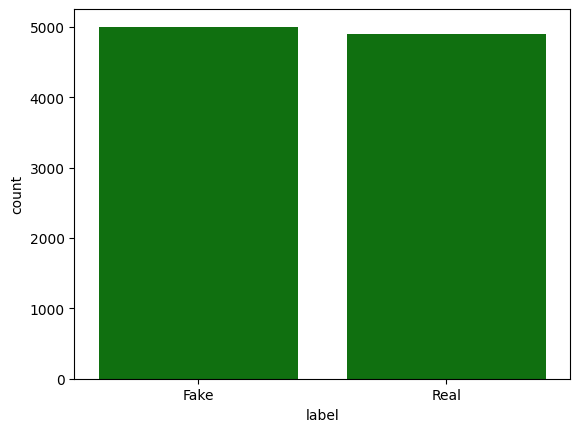

In [6]:
# Visualization of labels
import seaborn as sns
sns.countplot(data=df, x = df['label'],color= 'green')
plt.show()

In [7]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [8]:
df.dtypes

Text     object
label    object
dtype: object

In [9]:
## Mapping the labels
df['label'] = df['label'].map({'Real':0,'Fake':1})

In [10]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,1
1,U.S. conservative leader optimistic of common ...,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",0
3,Court Forces Ohio To Allow Millions Of Illega...,1
4,Democrats say Trump agrees to work on immigrat...,0


## Data Preprocessing

In [11]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to D:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to D:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [13]:
lemmetizer = WordNetLemmatizer()

In [14]:
def preprocess_data(txt):
    cleantxt = re.sub(r'http\S+|www\.\S+', '',txt)  # remove links
    cleantxt = re.sub(r'@\S+','',cleantxt)          # remove mentions
    cleantxt = re.sub(r'#\S+','',cleantxt)          # remove hashtags
    cleantxt = re.sub(r'[^\w\s]','',cleantxt)       # remove white spaces
    cleantxt = re.sub('[^a-zA-Z]',' ',cleantxt)
    cleantxt = cleantxt.lower()
    words = word_tokenize(cleantxt)
    words = [lemmetizer.lemmatize(word,pos='v') for word in words if not word in stopwords.words('english')]
    cleantxt = ' '.join(words)
    return cleantxt 

In [15]:
preprocess_data("Aditya is bad boys which studie*d in btech 2024. He's contact no.:- 5647382920, email id :- adi@gmail.com , https://www.google.com")

'aditya bad boys study btech hes contact email id adi'

In [16]:
df['Text'] = df['Text'].apply(preprocess_data)

In [17]:
df.head()

,Text,label
0,top trump surrogate brutally stab back hes pat...,1
1,us conservative leader optimistic common grind...,0
2,trump propose us tax overhaul stir concern def...,0
3,court force ohio allow millions illegally purg...,1
4,democrats say trump agree work immigration bil...,0


In [18]:
df['Text'][12]

'trump dossier firm republicans leak bank record retaliation washington reuters firm commission dossier detail link thenpresidential candidate donald trump campaign russia say court file republicans leak company bank data media partisan political purpose democrats say republicans use leak undermine investigations trump campaign congress special counsel robert mueller republicans accuse democrats leak information undermine trump administration republican attack muellers probe us allegations russia interfere election help trump possible collusion moscow officials include efforts discredit dossier kremlin deny allegations meddle trump deny collusion fusion gps notice federal judge washington late tuesday say subpoena send republicanled us house representatives intelligence committee chairman devin nunes firm bank part ongoing effort discredit fusion retaliation role undertake research trump election fusions court document say information founder glenn simpson provide committee close door 

In [19]:
## Spliting The Data
from sklearn.model_selection import train_test_split

In [20]:
train,test = train_test_split(df, test_size=0.2, random_state=42)
train,val = train_test_split(train,test_size=0.1, random_state=42)

In [21]:
train.shape,val.shape,test.shape

((7128, 2), (792, 2), (1980, 2))

In [22]:
x_train = train['Text']
y_train = train['label']

x_test = test['Text']
y_test = test['label']

x_val = val['Text']
y_val = val['label']

In [23]:
type(x_train),type(x_test), type(y_train), type(y_test), type(x_val), type(y_val)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [31]:
tokenizer = Tokenizer()

In [32]:
tokenizer.fit_on_texts(df['Text'])

In [33]:
X_Train = tokenizer.texts_to_sequences(x_train)
X_Val = tokenizer.texts_to_sequences(x_val)
X_Test = tokenizer.texts_to_sequences(x_test)

In [34]:
len(X_Train),len(X_Val), len(X_Test)

(7128, 792, 1980)

In [38]:
X_Train_Pad = pad_sequences(X_Train,maxlen=500,padding='post')
X_Val_Pad = pad_sequences(X_Val,maxlen=500,padding='post')
X_Test_Pad = pad_sequences(X_Test,maxlen=500,padding='post')

In [42]:
X_Train_Pad.shape,X_Val_Pad.shape,X_Test_Pad.shape

((7128, 500), (792, 500), (1980, 500))

In [43]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

72479

## Simple RNN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=32,input_length=500))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

d:\Fake_News_Detection(new)\even\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
early_stopping_rnn = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
early_stopping_rnn  

In [49]:
history = model.fit(
    X_Train_Pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_Val_Pad, y_val),
    callbacks=[early_stopping_rnn]
)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.5144 - loss: 0.6970 - val_accuracy: 0.5177 - val_loss: 0.6944
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.5292 - loss: 0.6901 - val_accuracy: 0.5000 - val_loss: 0.6971
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - accuracy: 0.5256 - loss: 0.6891 - val_accuracy: 0.5038 - val_loss: 0.6994
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.5304 - loss: 0.6731 - val_accuracy: 0.5013 - val_loss: 0.7023
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.5511 - loss: 0.6663 - val_accuracy: 0.5076 - val_loss: 0.6874
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.5328 - loss: 0.6694 - val_accuracy: 0.5013 - val_loss: 0.6964
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - accuracy: 0.5565 - loss: 0.6595 - val_accuracy: 0.5063 - val_loss: 0.6950
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.5493 - loss: 0

In [50]:
Y_train_rnn = model.predict(X_Train_Pad)

223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


In [51]:
Y_train_rnn = np.where(Y_train_rnn>0.5,1,0)

In [52]:
## Confusion Matrix
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_train,Y_train_rnn))

Confusion_Matrix_Train:-
 [[3442   42]
 [3611   33]]


In [53]:
## Training Accuracy
print("Training_Accuracy:-",accuracy_score(y_train,Y_train_rnn))

Training_Accuracy:- 0.48751402918069586


In [54]:
## Classification Report
print("Classification_Report_Train:-\n",classification_report(y_train,Y_train_rnn))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       0.49      0.99      0.65      3484
           1       0.44      0.01      0.02      3644

    accuracy                           0.49      7128
   macro avg       0.46      0.50      0.34      7128
weighted avg       0.46      0.49      0.33      7128



In [55]:
y_test_rnn = model.predict(X_Test_Pad)

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


In [56]:
y_test_rnn = np.where(y_test_rnn>0.5,1,0)

In [57]:
## Confusion Matrix
print("Confusion_Matrix_Test:-\n",confusion_matrix(y_test,y_test_rnn))

Confusion_Matrix_Test:-
 [[978  29]
 [968   5]]


In [58]:
## Testing Accuracy
print("Testing_Accuracy:-",accuracy_score(y_test,y_test_rnn))

Testing_Accuracy:- 0.49646464646464644


In [59]:
## Classification Report
print("Classification_Report_Test:-\n",classification_report(y_test,y_test_rnn))

Classification_Report_Test:-
               precision    recall  f1-score   support

           0       0.50      0.97      0.66      1007
           1       0.15      0.01      0.01       973

    accuracy                           0.50      1980
   macro avg       0.32      0.49      0.34      1980
weighted avg       0.33      0.50      0.34      1980



## LSTM Model

In [60]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import BinaryCrossentropy

In [61]:
opt = Adam(learning_rate=0.0001,clipvalue=1.0)

In [62]:
loss = BinaryCrossentropy()

In [63]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=32,input_length=500))
model_lstm.add(LSTM(64,return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1,activation='sigmoid'))

d:\Fake_News_Detection(new)\even\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [64]:
model_lstm.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [65]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
early_stopping_lstm = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
early_stopping_lstm

In [67]:
history = model_lstm.fit(
    X_Train_Pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_Val_Pad, y_val),
    callbacks=[early_stopping_lstm]
)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - accuracy: 0.5361 - loss: 0.6921 - val_accuracy: 0.5152 - val_loss: 0.6941
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 36s 323ms/step - accuracy: 0.5546 - loss: 0.6893 - val_accuracy: 0.5164 - val_loss: 0.6909
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 347ms/step - accuracy: 0.5657 - loss: 0.6822 - val_accuracy: 0.5568 - val_loss: 0.6706
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 352ms/step - accuracy: 0.5906 - loss: 0.6532 - val_accuracy: 0.5758 - val_loss: 0.6608
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - accuracy: 0.6562 - loss: 0.6268 - val_accuracy: 0.6591 - val_loss: 0.6380
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 358ms/step - accuracy: 0.7381 - loss: 0.5658 - val_accuracy: 0.8422 - val_loss: 0.4373
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 358ms/step - accuracy: 0.8431 - loss: 0.4302 - val_accuracy: 0.8333 - val_loss: 0.4185
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.8532 - loss: 0

In [68]:
y_train_lstm = model_lstm.predict(X_Train_Pad)

223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step


In [69]:
y_train_lstm = np.where(y_train_lstm>0.5,1,0)

In [70]:
## Confusion Matrix
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_train,y_train_lstm))

Confusion_Matrix_Train:-
 [[2565  919]
 [ 113 3531]]


In [71]:
## Training Accuracy
print("Training_Accuracy:-",accuracy_score(y_train,y_train_lstm))

Training_Accuracy:- 0.8552188552188552


In [72]:
## Classification Report
print("Classification_Report_Train:-\n",classification_report(y_train,y_train_lstm))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       0.96      0.74      0.83      3484
           1       0.79      0.97      0.87      3644

    accuracy                           0.86      7128
   macro avg       0.88      0.85      0.85      7128
weighted avg       0.87      0.86      0.85      7128



In [73]:
y_test_lstm = model_lstm.predict(X_Test_Pad)

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step


In [74]:
y_test_lstm = np.where(y_test_lstm>0.5,1,0)

In [75]:
## Confusion Matrix
print("Confusion_Matrix_Test:-\n",confusion_matrix(y_test,y_test_lstm))

Confusion_Matrix_Test:-
 [[730 277]
 [ 38 935]]


In [76]:
## Testing Accuracy
print("Testing_Accuracy:-",accuracy_score(y_test,y_test_lstm))

Testing_Accuracy:- 0.8409090909090909


In [77]:
## Classification Report
print("Classification_Report_Test:-\n",classification_report(y_test,y_test_lstm))

Classification_Report_Test:-
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      1007
           1       0.77      0.96      0.86       973

    accuracy                           0.84      1980
   macro avg       0.86      0.84      0.84      1980
weighted avg       0.86      0.84      0.84      1980



## GRU Model

In [78]:
from tensorflow.keras.layers import GRU

In [79]:
optz = Adam(learning_rate=0.0001,clipvalue=1.0)

In [80]:
loss = BinaryCrossentropy()

In [81]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=32,input_length=500))
model_gru.add(GRU(64,return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(1,activation='sigmoid'))

d:\Fake_News_Detection(new)\even\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [82]:
model_gru.compile(optimizer=optz, loss=loss, metrics=['accuracy'])

In [83]:
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
early_stopping_gru = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
early_stopping_gru

In [85]:
history = model_gru.fit(
    X_Train_Pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_Val_Pad, y_val),
    callbacks=[early_stopping_gru]
)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - accuracy: 0.5241 - loss: 0.6922 - val_accuracy: 0.5101 - val_loss: 0.6943
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 347ms/step - accuracy: 0.5345 - loss: 0.6920 - val_accuracy: 0.5164 - val_loss: 0.6943
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 37s 332ms/step - accuracy: 0.5426 - loss: 0.6899 - val_accuracy: 0.5152 - val_loss: 0.6914
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 38s 343ms/step - accuracy: 0.5450 - loss: 0.6863 - val_accuracy: 0.5152 - val_loss: 0.6846
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 305ms/step - accuracy: 0.5601 - loss: 0.6708 - val_accuracy: 0.5215 - val_loss: 0.6756
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 304ms/step - accuracy: 0.5511 - loss: 0.6695 - val_accuracy: 0.5189 - val_loss: 0.6795
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 308ms/step - accuracy: 0.5524 - loss: 0.6656 - val_accuracy: 0.5379 - val_loss: 0.6755
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 302ms/step - accuracy: 0.5817 - loss: 0

In [86]:
y_train_gru = model_gru.predict(X_Train_Pad)

223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step


In [87]:
y_train_gru = np.where(y_train_gru>0.5,1,0)

In [88]:
## Confusion Matrix
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_train,y_train_gru))

Confusion_Matrix_Train:-
 [[ 474 3010]
 [  21 3623]]


In [89]:
## Training Accuracy
print("Training_Accuracy:-",accuracy_score(y_train,y_train_gru))

Training_Accuracy:- 0.5747755331088664


In [90]:
## Classification Report
print("Classification_Report_Train:-\n",classification_report(y_train,y_train_gru))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       0.96      0.14      0.24      3484
           1       0.55      0.99      0.71      3644

    accuracy                           0.57      7128
   macro avg       0.75      0.57      0.47      7128
weighted avg       0.75      0.57      0.48      7128



In [91]:
y_test_gru = model_gru.predict(X_Test_Pad)

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


In [92]:
y_test_gru = np.where(y_test_gru>0.5,1,0)

In [93]:
## Confusion Matrix
print("Confusion_Matrix_Test:-\n",confusion_matrix(y_test,y_test_gru))

Confusion_Matrix_Test:-
 [[120 887]
 [  9 964]]


In [94]:
## Testing Accuracy
print("Testing_Accuracy:-",accuracy_score(y_test,y_test_gru))

Testing_Accuracy:- 0.5474747474747474


In [95]:
## Classification Report
print("Classification_Report_Test:-\n",classification_report(y_test,y_test_gru))

Classification_Report_Test:-
               precision    recall  f1-score   support

           0       0.93      0.12      0.21      1007
           1       0.52      0.99      0.68       973

    accuracy                           0.55      1980
   macro avg       0.73      0.55      0.45      1980
weighted avg       0.73      0.55      0.44      1980



## Bidirectional LSTM

In [96]:
from tensorflow.keras.layers import Bidirectional

In [97]:
model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(input_dim=vocab_size, output_dim=32,input_length=500))
model_bi_lstm.add(Bidirectional(LSTM(64,return_sequences=True)))
model_bi_lstm.add(Bidirectional(LSTM(32)))
model_bi_lstm.add(Dense(1,activation='sigmoid'))

d:\Fake_News_Detection(new)\even\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [98]:
model_bi_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
model_bi_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [100]:
early_stopping_bi_lstm = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
early_stopping_bi_lstm

In [101]:
history = model_bi_lstm.fit(
    X_Train_Pad, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(X_Val_Pad, y_val),
    callbacks=[early_stopping_bi_lstm]
)

Epoch 1/2
223/223 ━━━━━━━━━━━━━━━━━━━━ 72s 303ms/step - accuracy: 0.8490 - loss: 0.3040 - val_accuracy: 0.9949 - val_loss: 0.0259
Epoch 2/2
223/223 ━━━━━━━━━━━━━━━━━━━━ 67s 302ms/step - accuracy: 0.9988 - loss: 0.0119 - val_accuracy: 0.9899 - val_loss: 0.0285


In [102]:
y_train_bi_lstm = model_bi_lstm.predict(X_Train_Pad)

223/223 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step


In [103]:
y_train_bi_lstm = np.where(y_train_bi_lstm>0.5,1,0)

In [104]:
## Confusion Matrix
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_train,y_train_bi_lstm))

Confusion_Matrix_Train:-
 [[3481    3]
 [   3 3641]]


In [105]:
## Training Accuracy
print("Training Accuracy:-",accuracy_score(y_train,y_train_bi_lstm))

Training Accuracy:- 0.9991582491582491


In [106]:
## Classification Report
print("Classification_Report_Train:-\n",classification_report(y_train,y_train_bi_lstm))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3484
           1       1.00      1.00      1.00      3644

    accuracy                           1.00      7128
   macro avg       1.00      1.00      1.00      7128
weighted avg       1.00      1.00      1.00      7128



In [107]:
y_test_bi_lstm = model_bi_lstm.predict(X_Test_Pad)

62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step


In [108]:
y_test_bi_lstm = np.where(y_test_bi_lstm>0.5,1,0)

In [109]:
## Confusion Matrix
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_test,y_test_bi_lstm))

Confusion_Matrix_Train:-
 [[1007    0]
 [   6  967]]


In [110]:
## Testing Accuracy
print("Testing Accuracy:-",accuracy_score(y_test,y_test_bi_lstm))

Testing Accuracy:- 0.996969696969697


In [111]:
## Classification Report
print("Classification_Report_Train:-\n",classification_report(y_test,y_test_bi_lstm))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1007
           1       1.00      0.99      1.00       973

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



## Bidirectional GRU

In [112]:
model_bi_gru = Sequential()
model_bi_gru.add(Embedding(input_dim=vocab_size, output_dim=32,input_length=500))
model_bi_gru.add(Bidirectional(GRU(64,return_sequences=True)))
model_bi_gru.add(Bidirectional(GRU(32)))
model_bi_gru.add(Dense(1,activation='sigmoid'))

d:\Fake_News_Detection(new)\even\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [113]:
model_bi_gru.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
model_bi_gru.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
early_stopping_bi_gru = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
early_stopping_bi_gru

In [116]:
history = model_bi_gru.fit(
    X_Train_Pad, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(X_Val_Pad, y_val),
    callbacks=[early_stopping_bi_gru]
)

Epoch 1/2
223/223 ━━━━━━━━━━━━━━━━━━━━ 78s 322ms/step - accuracy: 0.8453 - loss: 0.3010 - val_accuracy: 0.9937 - val_loss: 0.0198
Epoch 2/2
223/223 ━━━━━━━━━━━━━━━━━━━━ 70s 313ms/step - accuracy: 0.9996 - loss: 0.0051 - val_accuracy: 0.9949 - val_loss: 0.0200


In [117]:
y_train_bi_gru = model_bi_gru.predict(X_Train_Pad)

223/223 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step


In [118]:
y_train_bi_gru = np.where(y_train_bi_gru>0.5,1,0)

In [119]:
## Confusion Matrix
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_train,y_train_bi_gru))

Confusion_Matrix_Train:-
 [[3483    1]
 [   9 3635]]


In [120]:
## Training Accuracy
print("Training Accuracy:-",accuracy_score(y_train,y_train_bi_gru))

Training Accuracy:- 0.9985970819304153


In [121]:
## Classification Report
print("Classification_Report_Train:-\n",classification_report(y_train,y_train_bi_gru))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3484
           1       1.00      1.00      1.00      3644

    accuracy                           1.00      7128
   macro avg       1.00      1.00      1.00      7128
weighted avg       1.00      1.00      1.00      7128



In [122]:
y_test_bi_gru = model_bi_gru.predict(X_Test_Pad)

62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step


In [123]:
y_test_bi_gru = np.where(y_test_bi_gru>0.5,1,0)

In [124]:
## Confusion Matrix
print("Confusion_Matrix_Test:-\n",confusion_matrix(y_test,y_test_bi_gru))

Confusion_Matrix_Test:-
 [[1006    1]
 [   3  970]]


In [125]:
## Testing Accuracy
print("Testing Accuracy:-",accuracy_score(y_test,y_test_bi_gru))

Testing Accuracy:- 0.997979797979798


In [126]:
## Classification Report
print("Classification_Report_Test:-\n",classification_report(y_test,y_test_bi_gru))

Classification_Report_Test:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00       973

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980

